# 1 How to detrend a time series

- __remove line of best fit__ Remove the linear trend by signal.detrend(TS) function

- __remove the trend component__ Remove the trend component using  __season_decompose()__ function

- __substract the mean__ Remove the trend using __mean()__ function

- __using Baxter-king__ and __Hodrick-Presceott__ Filter
        - statsmodels.tsa.filters.bkfilter
        - statsmodels.tsa.filters.hpfilter

- __difference the Time Series__
        - import pandas as pd
        - Time_Series.diff()

## 1.1 remove line of best fit 
        - signal.detrend(TS) 

         #Passengers
Month               
1949-01          112
1949-02          118
1949-03          132
1949-04          129
1949-05          121


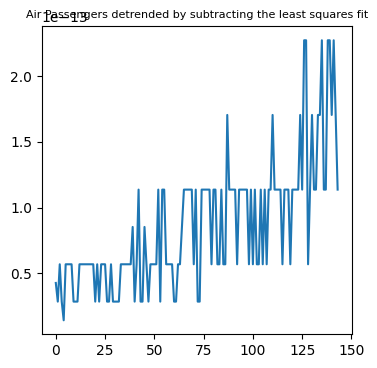

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
df = pd.read_csv('AirPassengers.csv',index_col=0)
print(df.head())
detrended = signal.detrend(df)

plt.rcParams['figure.figsize'] = [4, 4]
plt.plot(detrended)
plt.title(
    'Air Passengers detrended by subtracting the least squares fit'
    ,fontsize=8)
plt.show()

## 1.2 __remove the trend component__
- Remove the trend component using  __season_decompose()__ function

Text(0.5, 1.0, 'Time Series detrended by subtracting the trend component')

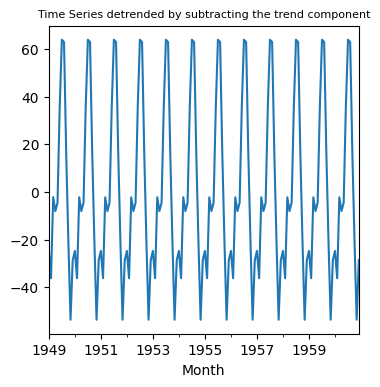

In [41]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('AirPassengers.csv',  parse_dates=True, 
                 index_col='Month')
result_add = seasonal_decompose(df, model='add')

plt.rcParams['figure.figsize'] = [4, 4]
result_add.seasonal.plot()
plt.title('Time Series detrended by subtracting the trend component', 
          fontsize=8)

## 1.3 subtract the mean
- Remove the trend using __mean()__ function

#Passengers    280.298611
dtype: float64
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


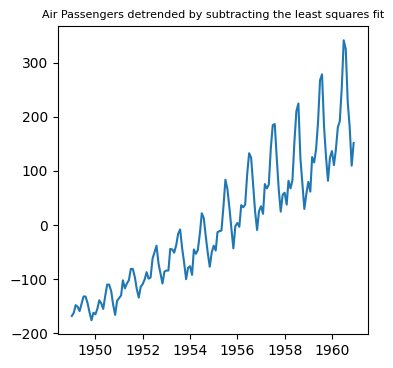

In [45]:
df_mean = df.mean()
print(df_mean)
df_resid = df-df_mean
print(df.head())


plt.rcParams['figure.figsize'] = [4, 4]
plt.plot(df_resid)
plt.title('Air Passengers detrended by subtracting the mean',
          fontsize=8)
plt.show()

## 1.4 Moving remove cyclical component using Hodrick-Prescott filter
- statsmodels.tsa.filters.hpfilter

<AxesSubplot:xlabel='Month'>

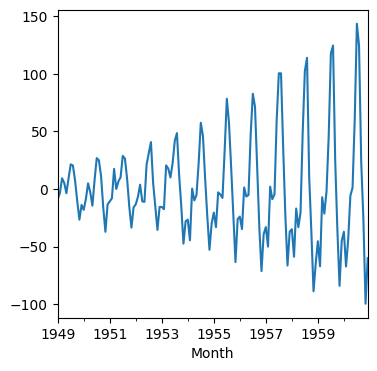

In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
df = pd.read_csv('AirPassengers.csv',  parse_dates=True, 
                 index_col='Month')
cyc, trend=sm.tsa.filters.hpfilter(df)
cyc.plot()

## 1.5 remove moving average trend line using Baxter-King filter
- statsmodels.tsa.filters.bkfilter

<AxesSubplot:xlabel='Month'>

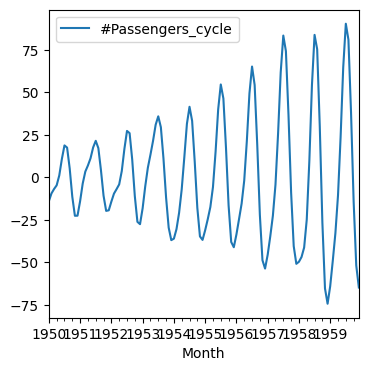

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
df = pd.read_csv('AirPassengers.csv',  parse_dates=True, 
                 index_col='Month')
cyc=sm.tsa.filters.bkfilter(df[["#Passengers"]])
cyc.plot()

## 1.6 detrend by differencing the Time Series
- import pandas as pd
- Time_Series.diff()

*__Syntax:DataFrame__*.shift(periods=1, freq=None, axis=0) 

*__Parameters__* : 
- periods : Number of periods to move, can be positive or negative 
- freq : DateOffset, timedelta, or time rule string, optional Increment to use from the tseries module or time rule (e.g. ‘EOM’). See Notes 
- axis : {0 or ‘index’, 1 or ‘columns’}
- Return : shifted : DataFrame

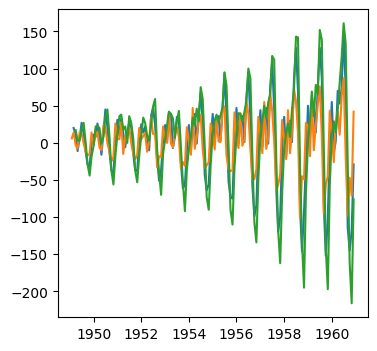

In [57]:
# detrend a time series using differencing
from pandas import read_csv
from matplotlib import pyplot
df = pd.read_csv('AirPassengers.csv',  parse_dates=True, 
                 index_col='Month')
diff=df
diff=df-df.shift(2)
plt.plot(diff)

diff_1=df-df.shift(1)
plt.plot(diff_1)


diff_3=df-df.shift(3)
plt.plot(diff_3)

# 2: How to make the Time Series stationary
- Differencing the Time_Series
- Take the log of the Time_Series
- Take the n-th Root of the Time Series
- Combination of the above

Month
1949-01-01    10.583005
1949-02-01    10.862780
1949-03-01    11.489125
1949-04-01    11.357817
1949-05-01    11.000000
Name: #Passengers, dtype: float64
            #Passengers
Month                  
1949-02-01          6.0
1949-03-01         14.0
1949-04-01         -3.0
1949-05-01         -8.0
1949-06-01         14.0
...                 ...
1960-08-01        -16.0
1960-09-01        -98.0
1960-10-01        -47.0
1960-11-01        -71.0
1960-12-01         42.0

[143 rows x 1 columns]


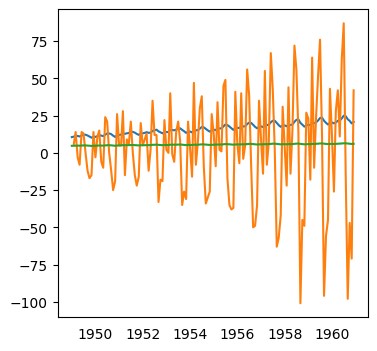

In [84]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
df = pd.read_csv('AirPassengers.csv',  parse_dates=True, 
                 index_col='Month')

# Take the square root
df_sqrt=np.sqrt(df['#Passengers'])
print(df_sqrt.head())
plt.plot(df_sqrt)

# Difference the Time_Series
df_diff=df.diff().dropna()
print(df_diff)
plt.plot(df_diff)

# Take the log of the Time_Series
df_log=np.log(df['#Passengers'])
plt.plot(df_log)



# 3 How to deal with the missing value
- Forward Fill
- Backward Fill
- Linear Fill
- Cubic Fill
- Mean of nearest neighbors (kNN)
- Mean of seasonal couterparts

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19240\1983321839.py:75: RuntimeWarning: Mean of empty slice
  if np.isnan(np.nanmean(ts_seas)):


<AxesSubplot:title={'center':'Seasonal Mean (MSE: 0.78)'}, xlabel='date'>

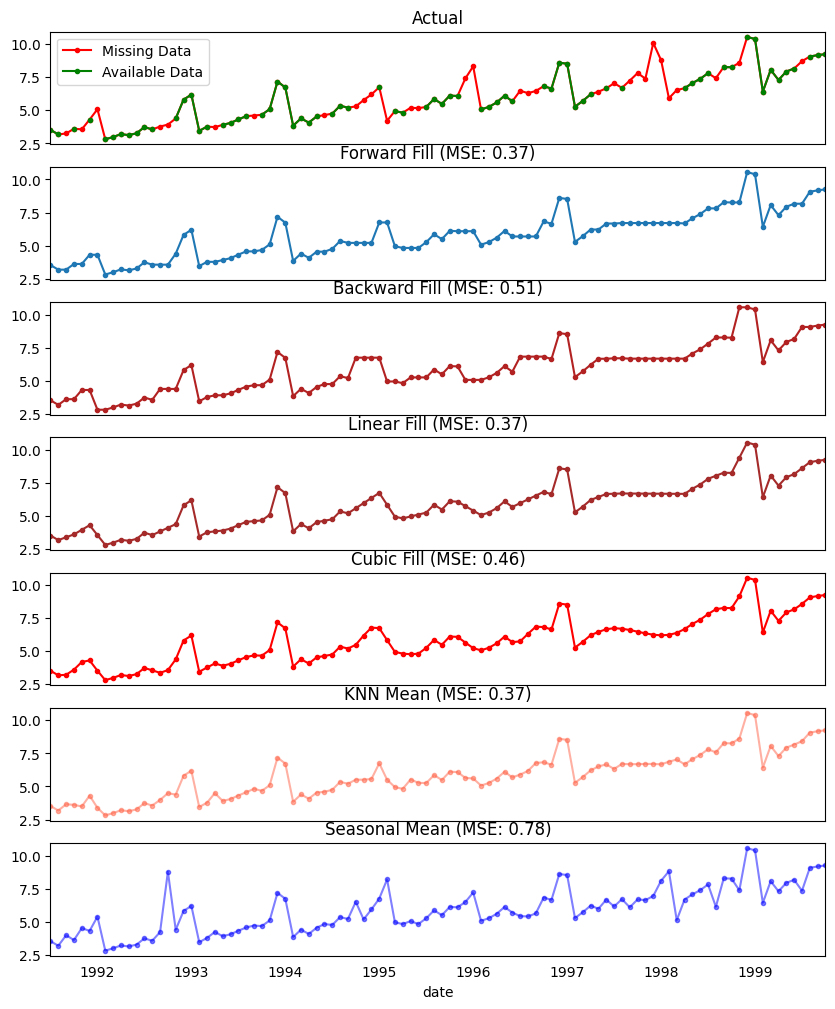

In [82]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('a10.csv', parse_dates=['date'], 
                      index_col='date').head(100)
df = pd.read_csv('a10_missings.csv', parse_dates=['date'], 
                 index_col='date')

# draw 7 subfigures and they share the x axis
fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', 
             color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', 
        color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])


## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], 
                                    df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", 
                       ax=axes[1], label='Forward Fill', style=".-")


## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], 
                                    df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", 
                       ax=axes[2], label='Back Fill', 
                       color='firebrick', style=".-")


## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])


error = np.round(mean_squared_error(df_orig['value'], 
                                    df['linear_fill']), 2)


df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", 
                       ax=axes[3], label='Cubic Fill',
                       color='brown', style=".-")


## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')

df['cubic_fill'] = f2(df['rownum'])

error = np.round(mean_squared_error(df_orig['value'], 
                                    df['cubic_fill']), 2)

df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", 
                      ax=axes[4], label='Cubic Fill', 
                      color='red', style=".-")


# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], 
                                    df['knn_mean']), 2)

df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", 
                    ax=axes[5], label='KNN Mean', 
                    color='tomato', alpha=0.5, style=".-")

def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)

error = np.round(mean_squared_error(df_orig['value'], 
                                    df['seasonal_mean']), 2)

df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", 
                         ax=axes[6], label='Seasonal Mean', 
                         color='blue', alpha=0.5, style=".-",)